In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Important libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Import datasets

In [ ]:
import zipfile
import os
# Extract ZIP file and list directories
zip_path = '/content/drive/MyDrive/T/Affecnet.zip'
extract_path = '/content/FER_DATA'

print(f"Extracting {zip_path} to {extract_path}...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed. Listing contents:")
for root, dirs, files in os.walk(extract_path):
    for dir_name in dirs:
        print(f"Directory: {os.path.join(root, dir_name)}")

Extracting /content/drive/MyDrive/T/Affecnet.zip to /content/FER_DATA...
Extraction completed. Listing contents:
Directory: /content/FER_DATA/fear
Directory: /content/FER_DATA/disgust
Directory: /content/FER_DATA/anger
Directory: /content/FER_DATA/neutral
Directory: /content/FER_DATA/sad
Directory: /content/FER_DATA/surprise
Directory: /content/FER_DATA/contempt
Directory: /content/FER_DATA/happy


## PreProcessing

In [ ]:
import os

# Path to the dataset folder
dataset_path = "/content/FER_DATA"

# Iterate over each emotion category
for emotion in os.listdir(dataset_path):
    emotion_path = os.path.join(dataset_path, emotion)
    if os.path.isdir(emotion_path):  # Check if it is a directory
        print(f"Processing category: {emotion}")
        for filename in os.listdir(emotion_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(emotion_path, filename)
                # Here you can load or process the image as needed
                print(f"Found image: {image_path}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Found image: /content/FER_DATA/happy/ffhq_3977.png
Found image: /content/FER_DATA/happy/ffhq_3857.png
Found image: /content/FER_DATA/happy/ffhq_4806.png
Found image: /content/FER_DATA/happy/ffhq_3571.png
Found image: /content/FER_DATA/happy/ffhq_1550.png
Found image: /content/FER_DATA/happy/ffhq_3005.png
Found image: /content/FER_DATA/happy/ffhq_1180.png
Found image: /content/FER_DATA/happy/ffhq_2011.png
Found image: /content/FER_DATA/happy/ffhq_1769.png
Found image: /content/FER_DATA/happy/ffhq_4764.png
Found image: /content/FER_DATA/happy/ffhq_1650.png
Found image: /content/FER_DATA/happy/ffhq_2340.png
Found image: /content/FER_DATA/happy/ffhq_2539.png
Found image: /content/FER_DATA/happy/ffhq_125.png
Found image: /content/FER_DATA/happy/ffhq_1427.png
Found image: /content/FER_DATA/happy/ffhq_4661.png
Found image: /content/FER_DATA/happy/ffhq_4853.png
Found image: /content/FER_DATA/happy/ffhq_3047.png
Found image: /content/FER_

# Label Encoder

In [ ]:
import os
import numpy as np
import shutil

# Path to the dataset folder
dataset_path = "/content/FER_DATA"

# List of emotions and their corresponding labels
emotions = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
labels = {emotion: idx for idx, emotion in enumerate(emotions)}

# Directory to save labeled data
label_path = "/content/LABELED_DATA"
os.makedirs(label_path, exist_ok=True)

# Iterate through each emotion and assign labels
for emotion in os.listdir(dataset_path):
    emotion_path = os.path.join(dataset_path, emotion)
    if os.path.isdir(emotion_path) and emotion in labels:
        label = labels[emotion]  # Get the label for the emotion
        print(f"Processing: {emotion} -> Label: {label}")

        # Destination folder for this emotion
        labeled_emotion_path = os.path.join(label_path, str(label))
        os.makedirs(labeled_emotion_path, exist_ok=True)

        # Iterate through each image file in the emotion folder
        for filename in os.listdir(emotion_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                src_path = os.path.join(emotion_path, filename)
                dst_path = os.path.join(labeled_emotion_path, filename)

                # Copy file to the labeled folder
                shutil.copy(src_path, dst_path)

print("Labeling completed.")

Processing: fear -> Label: 3
Processing: disgust -> Label: 2
Processing: anger -> Label: 0
Processing: neutral -> Label: 5
Processing: sad -> Label: 6
Processing: surprise -> Label: 7
Processing: contempt -> Label: 1
Processing: happy -> Label: 4
Labeling completed.


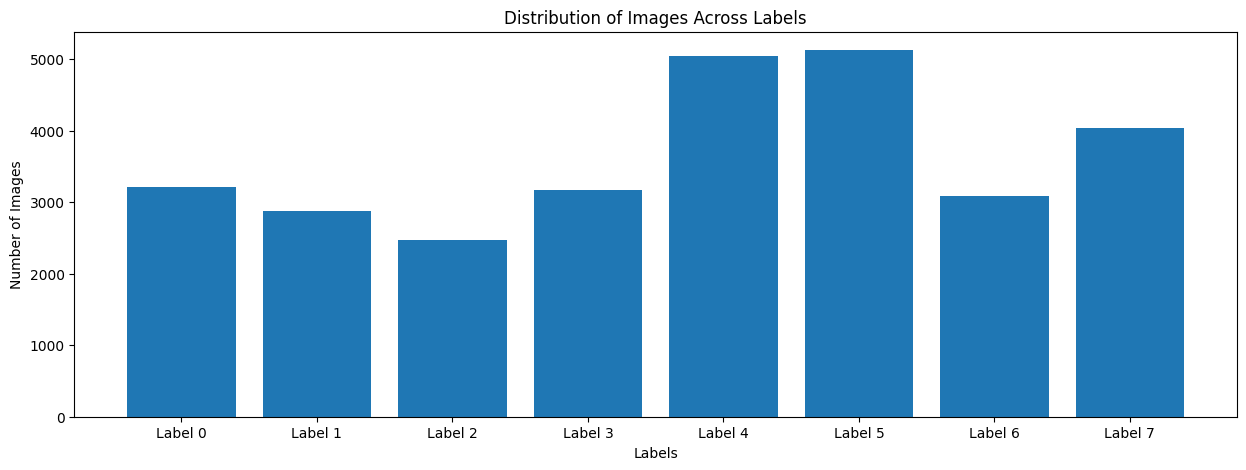

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to labeled data directory
labeled_data_path = "/content/LABELED_DATA"

# Initialize dictionary to count images per label
label_counts = {}

# Iterate through each label folder
for label in os.listdir(labeled_data_path):
    label_path = os.path.join(labeled_data_path, label)
    if os.path.isdir(label_path):  # Ensure it's a directory
        count = len([f for f in os.listdir(label_path) if f.endswith('.jpg') or f.endswith('.png')])
        label_counts[label] = count

# Sort labels for consistent display
sorted_labels = sorted(label_counts.items(), key=lambda x: int(x[0]))

# Separate labels and counts for plotting
labels, counts = zip(*sorted_labels)

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(labels, counts, tick_label=[f'Label {l}' for l in labels])
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Labels')
plt.show()

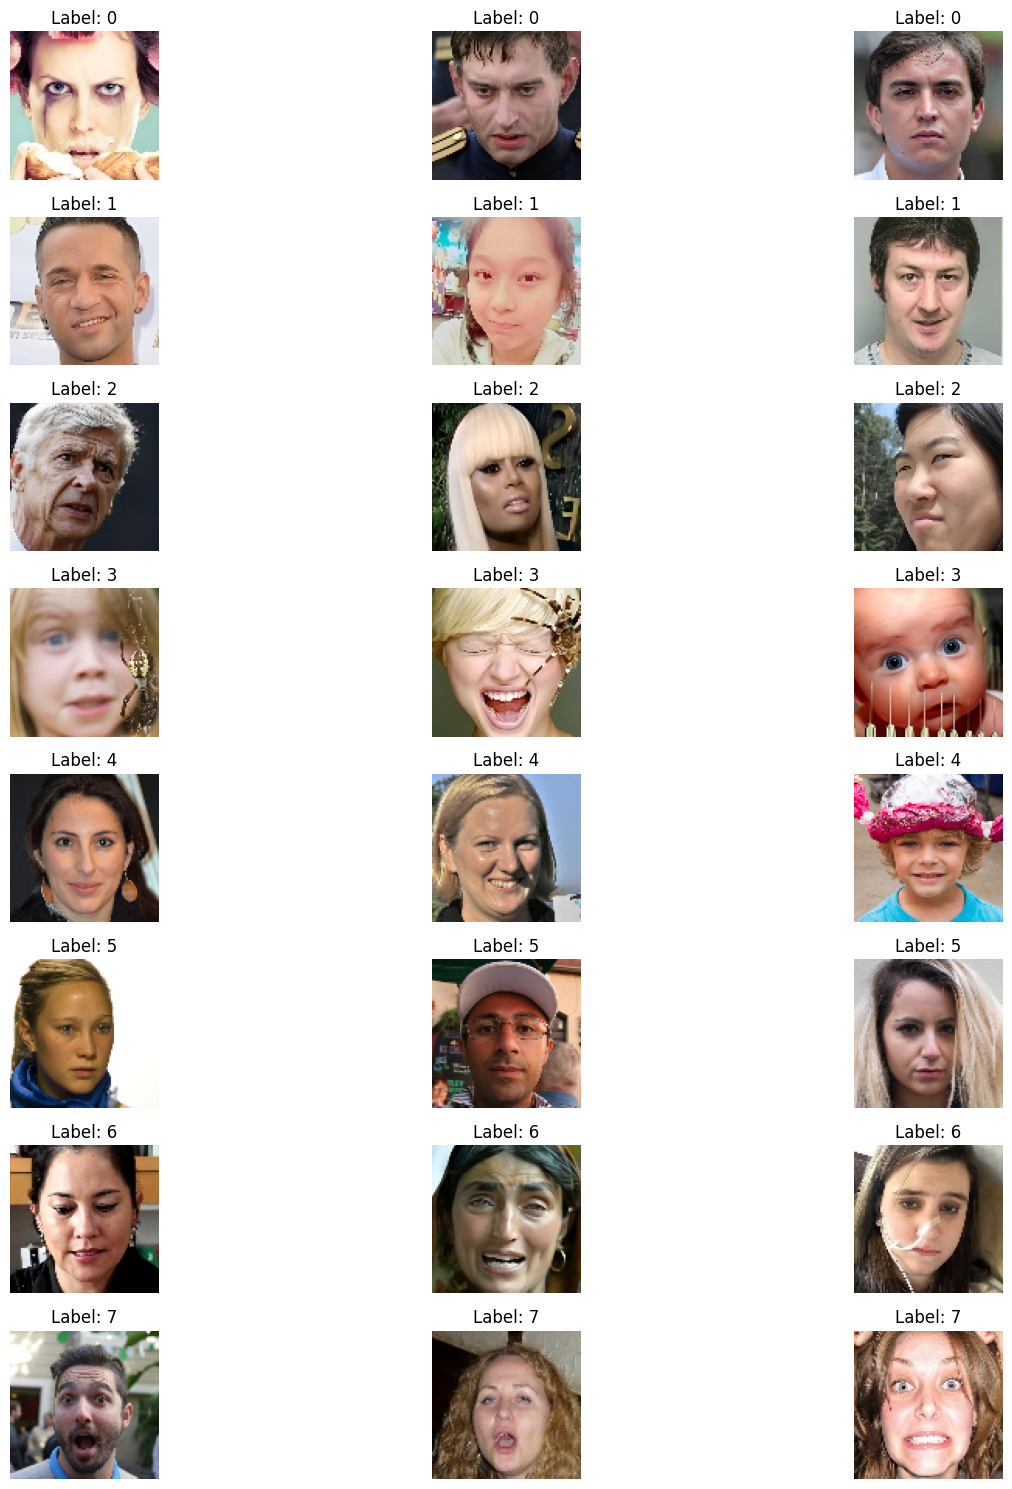

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

# Path to the labeled dataset
labeled_dataset_path = "/content/LABELED_DATA"

# Number of images to display per category
num_images_per_category = 3

# Create a figure for plotting
plt.figure(figsize=(15, 15))

# Iterate over labeled directories
label_directories = sorted(os.listdir(labeled_dataset_path))  # Sort by label
for label in label_directories:
    label_path = os.path.join(labeled_dataset_path, label)
    if os.path.isdir(label_path):
        # Get the list of image files in this category
        images = [f for f in os.listdir(label_path) if f.endswith('.jpg') or f.endswith('.png')]
        for i, img_file in enumerate(images[:num_images_per_category]):  # Limit to num_images_per_category
            img_path = os.path.join(label_path, img_file)

            # Read and plot the image
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
            plt.subplot(len(label_directories), num_images_per_category, int(label) * num_images_per_category + i + 1)
            plt.imshow(img)
            plt.title(f"Label: {label}")
            plt.axis("off")

plt.tight_layout()
plt.show()

# Augment and Balance classes

In [ ]:
!pip install imgaug opencv-python

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
from skimage import io

In [ ]:
import os
import pandas as pd
from skimage import io
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import numpy as np
import cv2
from imgaug import augmenters as iaa
import shutil

# Path to the labeled dataset
labeled_dataset_path = "/content/LABELED_DATA"
augmented_dataset_path = "/content/AUGMENTED_DATA"
os.makedirs(augmented_dataset_path, exist_ok=True)

# Augmentation pipeline
aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip with probability 0.5
    iaa.Affine(rotate=(-10, 10)),  # Random rotation within -10 to 10 degrees
    iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}),  # Random scaling within 90% to 110%
    iaa.Affine(shear=(-5, 5)),  # Random shear within -5 to 5 degrees
    iaa.GaussianBlur(sigma=(0, 0.5)),  # Gaussian blur with a small sigma
    iaa.AdditiveGaussianNoise(scale=(0, 0.01*255)),  # Small additive Gaussian noise
    iaa.ContrastNormalization((0.9, 1.1)),  # Slightly change contrast
    iaa.CLAHE(clip_limit=(1, 2))  # Apply CLAHE with a moderate clip limit
])

# Maximum number of images per category
max_count = 5000

# Function to apply augmentation
def augment_images(images, augment_count):
    augmented_images = []
    for _ in range(augment_count):
        augmented_images.extend(aug_pipeline(images=images))
    return augmented_images

# Balance classes
for label in os.listdir(labeled_dataset_path):
    label_path = os.path.join(labeled_dataset_path, label)
    augmented_label_path = os.path.join(augmented_dataset_path, label)
    os.makedirs(augmented_label_path, exist_ok=True)

    if os.path.isdir(label_path):
        images = []
        for filename in os.listdir(label_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)

        image_count = len(images)
        if image_count < max_count:
            augment_count = max_count - image_count
            print(f"Augmenting label {label} with {augment_count} images...")
            augmented_images = augment_images(images, augment_count // len(images))

            # Save augmented images
            for idx, aug_img in enumerate(augmented_images):
                aug_img = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
                aug_filename = os.path.join(augmented_label_path, f"aug_{idx}.jpg")
                cv2.imwrite(aug_filename, aug_img)

        # Copy original images to augmented dataset
        for filename in os.listdir(label_path):
            src_path = os.path.join(label_path, filename)
            dst_path = os.path.join(augmented_label_path, filename)
            shutil.copy(src_path, dst_path)

print("Augmentation and balancing completed.")

Augmenting label 3 with 1824 images...
Augmenting label 1 with 2129 images...
Augmenting label 6 with 1909 images...
Augmenting label 2 with 2523 images...
Augmenting label 7 with 961 images...
Augmenting label 0 with 1782 images...
Augmentation and balancing completed.


In [ ]:
import matplotlib.pyplot as plt
import random

# Function to plot images
def plot_images(images, title="Images", cols=5):
    rows = len(images) // cols + 1
    plt.figure(figsize=(15, rows * 3))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize augmented images for a random label
random_label = random.choice(os.listdir(labeled_dataset_path))
label_path = os.path.join(labeled_dataset_path, random_label)
images = []

for filename in os.listdir(label_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(label_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)

# Augment a few images to visualize
sample_images = images[:10]  # Take the first 10 images for demonstration
augmented_images = aug_pipeline(images=sample_images)

# Plot original images
plot_images(sample_images, title="Original Images")

# Plot augmented images
plot_images(augmented_images, title="Augmented Images")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to plot images
def plot_images(images, title="Images", cols=5):
    rows = len(images) // cols + 1
    plt.figure(figsize=(15, rows * 3))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize augmented images for a random label
random_label = random.choice(os.listdir(labeled_dataset_path))
label_path = os.path.join(labeled_dataset_path, random_label)
images = []

for filename in os.listdir(label_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(label_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)

# Augment a few images to visualize
sample_images = images[:10]  # Take the first 10 images for demonstration
augmented_images = aug_pipeline(images=sample_images)

# Plot original images
plot_images(sample_images, title="Original Images")

# Plot augmented images
plot_images(augmented_images, title="Augmented Images")

Output hidden; open in https://colab.research.google.com to view.

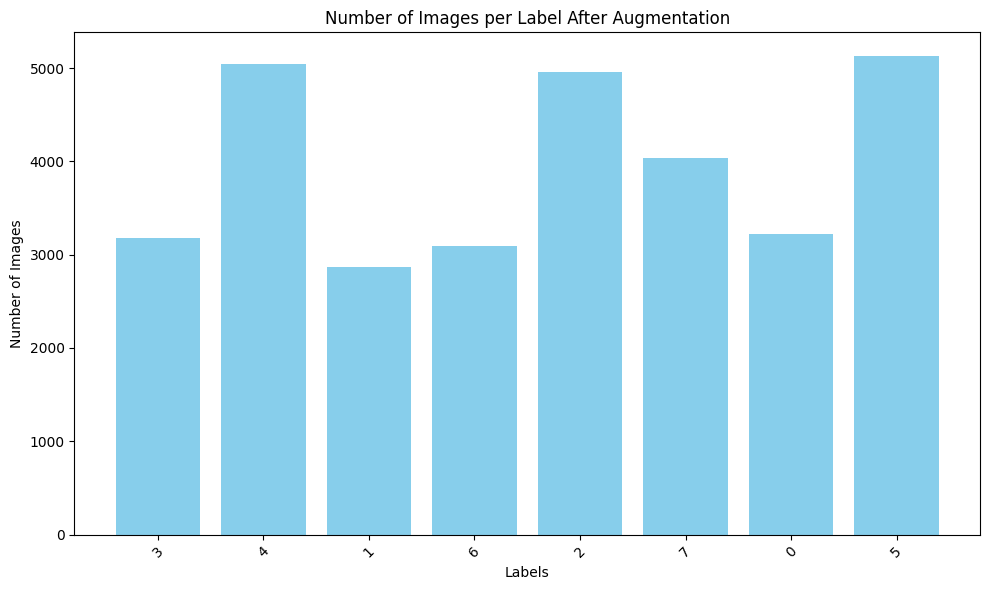

In [ ]:
# Count and plot the number of images per label after augmentation
label_counts = {}
for label in os.listdir(augmented_dataset_path):
    label_path = os.path.join(augmented_dataset_path, label)
    if os.path.isdir(label_path):
        label_counts[label] = len([name for name in os.listdir(label_path) if name.endswith('.jpg') or name.endswith('.png')])

# Plot the distribution of images per label
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Number of Images per Label After Augmentation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Split

In [ ]:
# Split data into train, validation, and test sets
train_dir = "/content/TRAIN_DATA"
val_dir = "/content/VAL_DATA"
test_dir = "/content/TEST_DATA"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

split_ratios = (0.7, 0.2, 0.1)  # 70% train, 20% validation, 10% test

for label in os.listdir(augmented_dataset_path):
    label_path = os.path.join(augmented_dataset_path, label)
    if os.path.isdir(label_path):
        images = [os.path.join(label_path, img) for img in os.listdir(label_path) if img.endswith('.jpg') or img.endswith('.png')]
        train_images, temp_images = train_test_split(images, test_size=(1 - split_ratios[0]), random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=split_ratios[2] / (split_ratios[1] + split_ratios[2]), random_state=42)

        # Create subdirectories for the label
        train_label_dir = os.path.join(train_dir, label)
        val_label_dir = os.path.join(val_dir, label)
        test_label_dir = os.path.join(test_dir, label)

        os.makedirs(train_label_dir, exist_ok=True)
        os.makedirs(val_label_dir, exist_ok=True)
        os.makedirs(test_label_dir, exist_ok=True)

        # Move images to respective directories
        for img_path in train_images:
            shutil.copy(img_path, os.path.join(train_label_dir, os.path.basename(img_path)))

        for img_path in val_images:
            shutil.copy(img_path, os.path.join(val_label_dir, os.path.basename(img_path)))

        for img_path in test_images:
            shutil.copy(img_path, os.path.join(test_label_dir, os.path.basename(img_path)))

print("Data splitting completed.")

Data splitting completed.


In [ ]:
# Calculate and display shapes of features (X) and target variable (y)
X = []
y = []

for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):
        for filename in os.listdir(label_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                X.append(img)
                y.append(label)

X = np.array(X)
y = np.array(y)

print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (22059, 96, 96, 3)
Shape of target variable (y): (22059,)


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create DataFrames for train, validation, and test sets
def create_dataframe(data_dir):
    image_paths = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    image_paths.append(os.path.join(label_dir, filename))
                    labels.append(label)
    df = pd.DataFrame({'filename': image_paths, 'class': labels})
    return df

train_df = create_dataframe(train_dir)
val_df = create_dataframe(val_dir)
test_df = create_dataframe(test_dir)

# Use ImageDataGenerator for data augmentation in training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, # Pass the train DataFrame here
    x_col='filename',
    y_col='class',
    target_size=(224, 224),  # Resize images to a fixed size
    batch_size=100,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df, # Pass the validation DataFrame here
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df, # Pass the test DataFrame here
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

Found 22059 validated image filenames belonging to 8 classes.
Found 6304 validated image filenames belonging to 8 classes.
Found 3156 validated image filenames belonging to 8 classes.


# DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

base_model =DenseNet201(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
            metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1,mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True,mode='min')

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_labels = os.listdir(train_dir)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weights_dict)

Class weights: {0: 1.2244116341030196, 1: 1.372511199601792, 2: 0.7953201615229305, 3: 1.2403846153846154, 4: 0.7811260623229461, 5: 0.7684991638795987, 6: 1.2747919556171983, 7: 0.9753714184648037}


In [ ]:
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
history=model.fit(
    train_generator,
    epochs=20,
    batch_size=100,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping],
    class_weight=class_weights_dict
)

Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.2406 - loss: 2.9620 - val_accuracy: 0.3671 - val_loss: 1.8415 - learning_rate: 0.0010
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.3657 - loss: 1.8146 - val_accuracy: 0.4299 - val_loss: 1.6561 - learning_rate: 0.0010
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.3799 - loss: 1.7300 - val_accuracy: 0.4034 - val_loss: 1.6860 - learning_rate: 0.0010
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.3953 - loss: 1.6736 - val_accuracy: 0.3574 - val_loss: 1.7809 - learning_rate: 0.0010
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.4050 - loss: 1.6513 - val_accuracy: 0.4216 - val_loss: 1.6195 - learning_rate: 1.0000e-04
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.4175 - loss: 1.6430 - val_accuracy: 0.4102 - val_loss: 1.6568 - learning_rate: 1.0000e-04
Epoch 7/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.4262 - 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error

predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')
mse = mean_squared_error(true_classes, predicted_classes)
bias = (np.mean(predicted_classes) - np.mean(true_classes)) ** 2
variance = np.var(predicted_classes)


print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Bias: {bias:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step
Accuracy: 0.42
Sensitivity: 0.84
Specificity: 0.49
Precision: 0.46
F1-Score: 0.40
AUC: 0.83
Mean Squared Error: 6.45
Variance: 4.40
Bias: 0.34


32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step


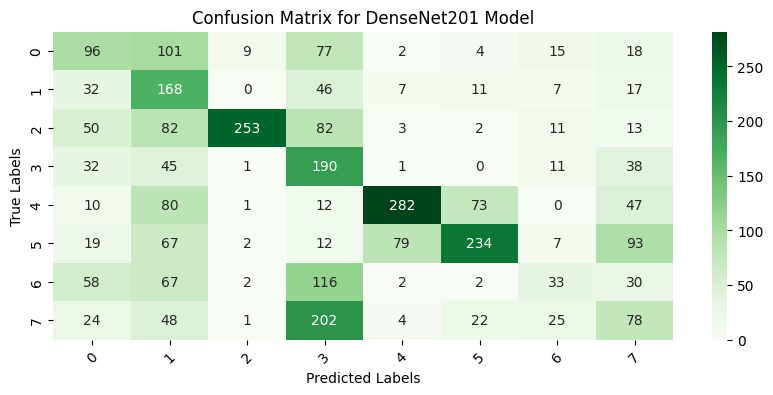

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for DenseNet201 Model')
plt.xticks(rotation=45)
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step


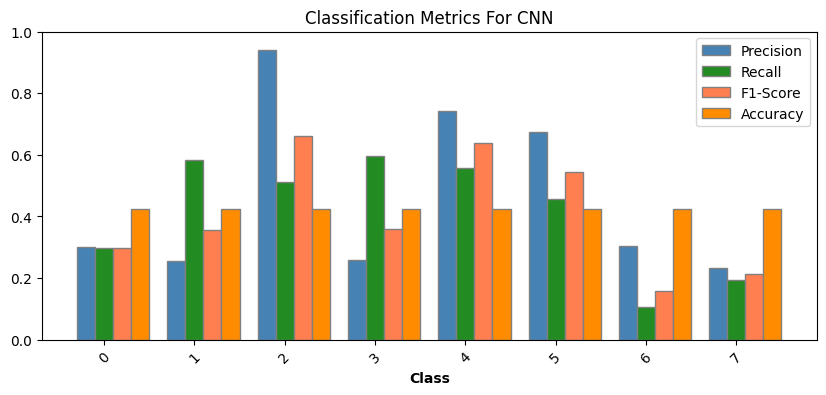

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

precision, recall, f1, _ = precision_recall_fscore_support(true_classes, predicted_classes)

accuracy = [accuracy_score(true_classes, predicted_classes) for _ in range(len(class_labels))]

plt.figure(figsize=(10, 4))

bar_width = 0.2
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precision, color='steelblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='forestgreen', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1, color='coral', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='darkorange', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_labels))], class_labels, rotation=45)
plt.title('Classification Metrics For CNN')
plt.legend()
plt.ylim(0, 1)
plt.show()

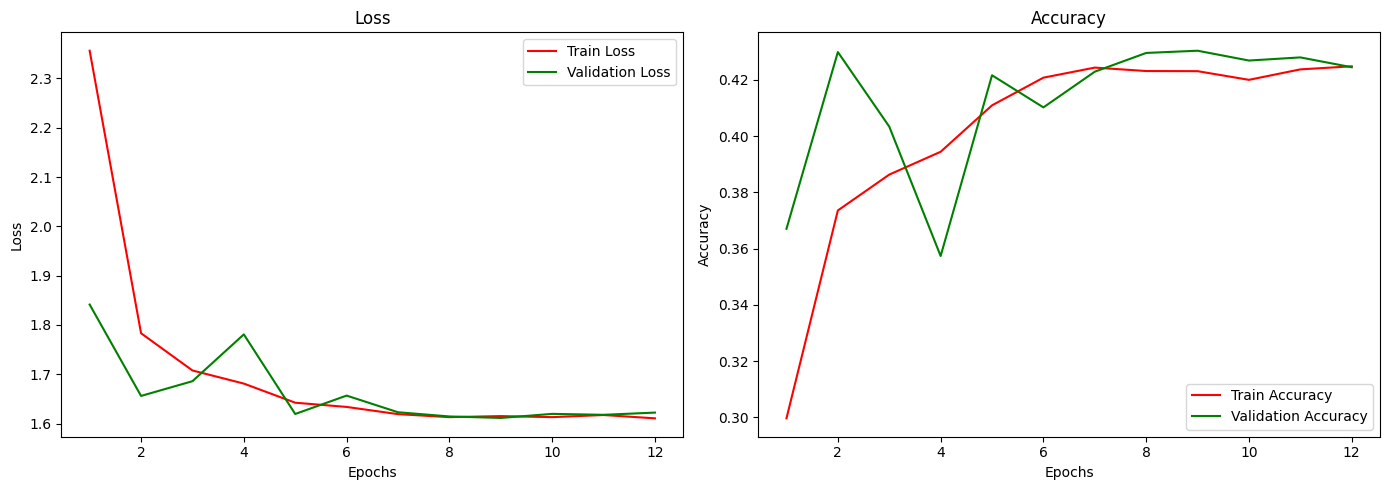

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step


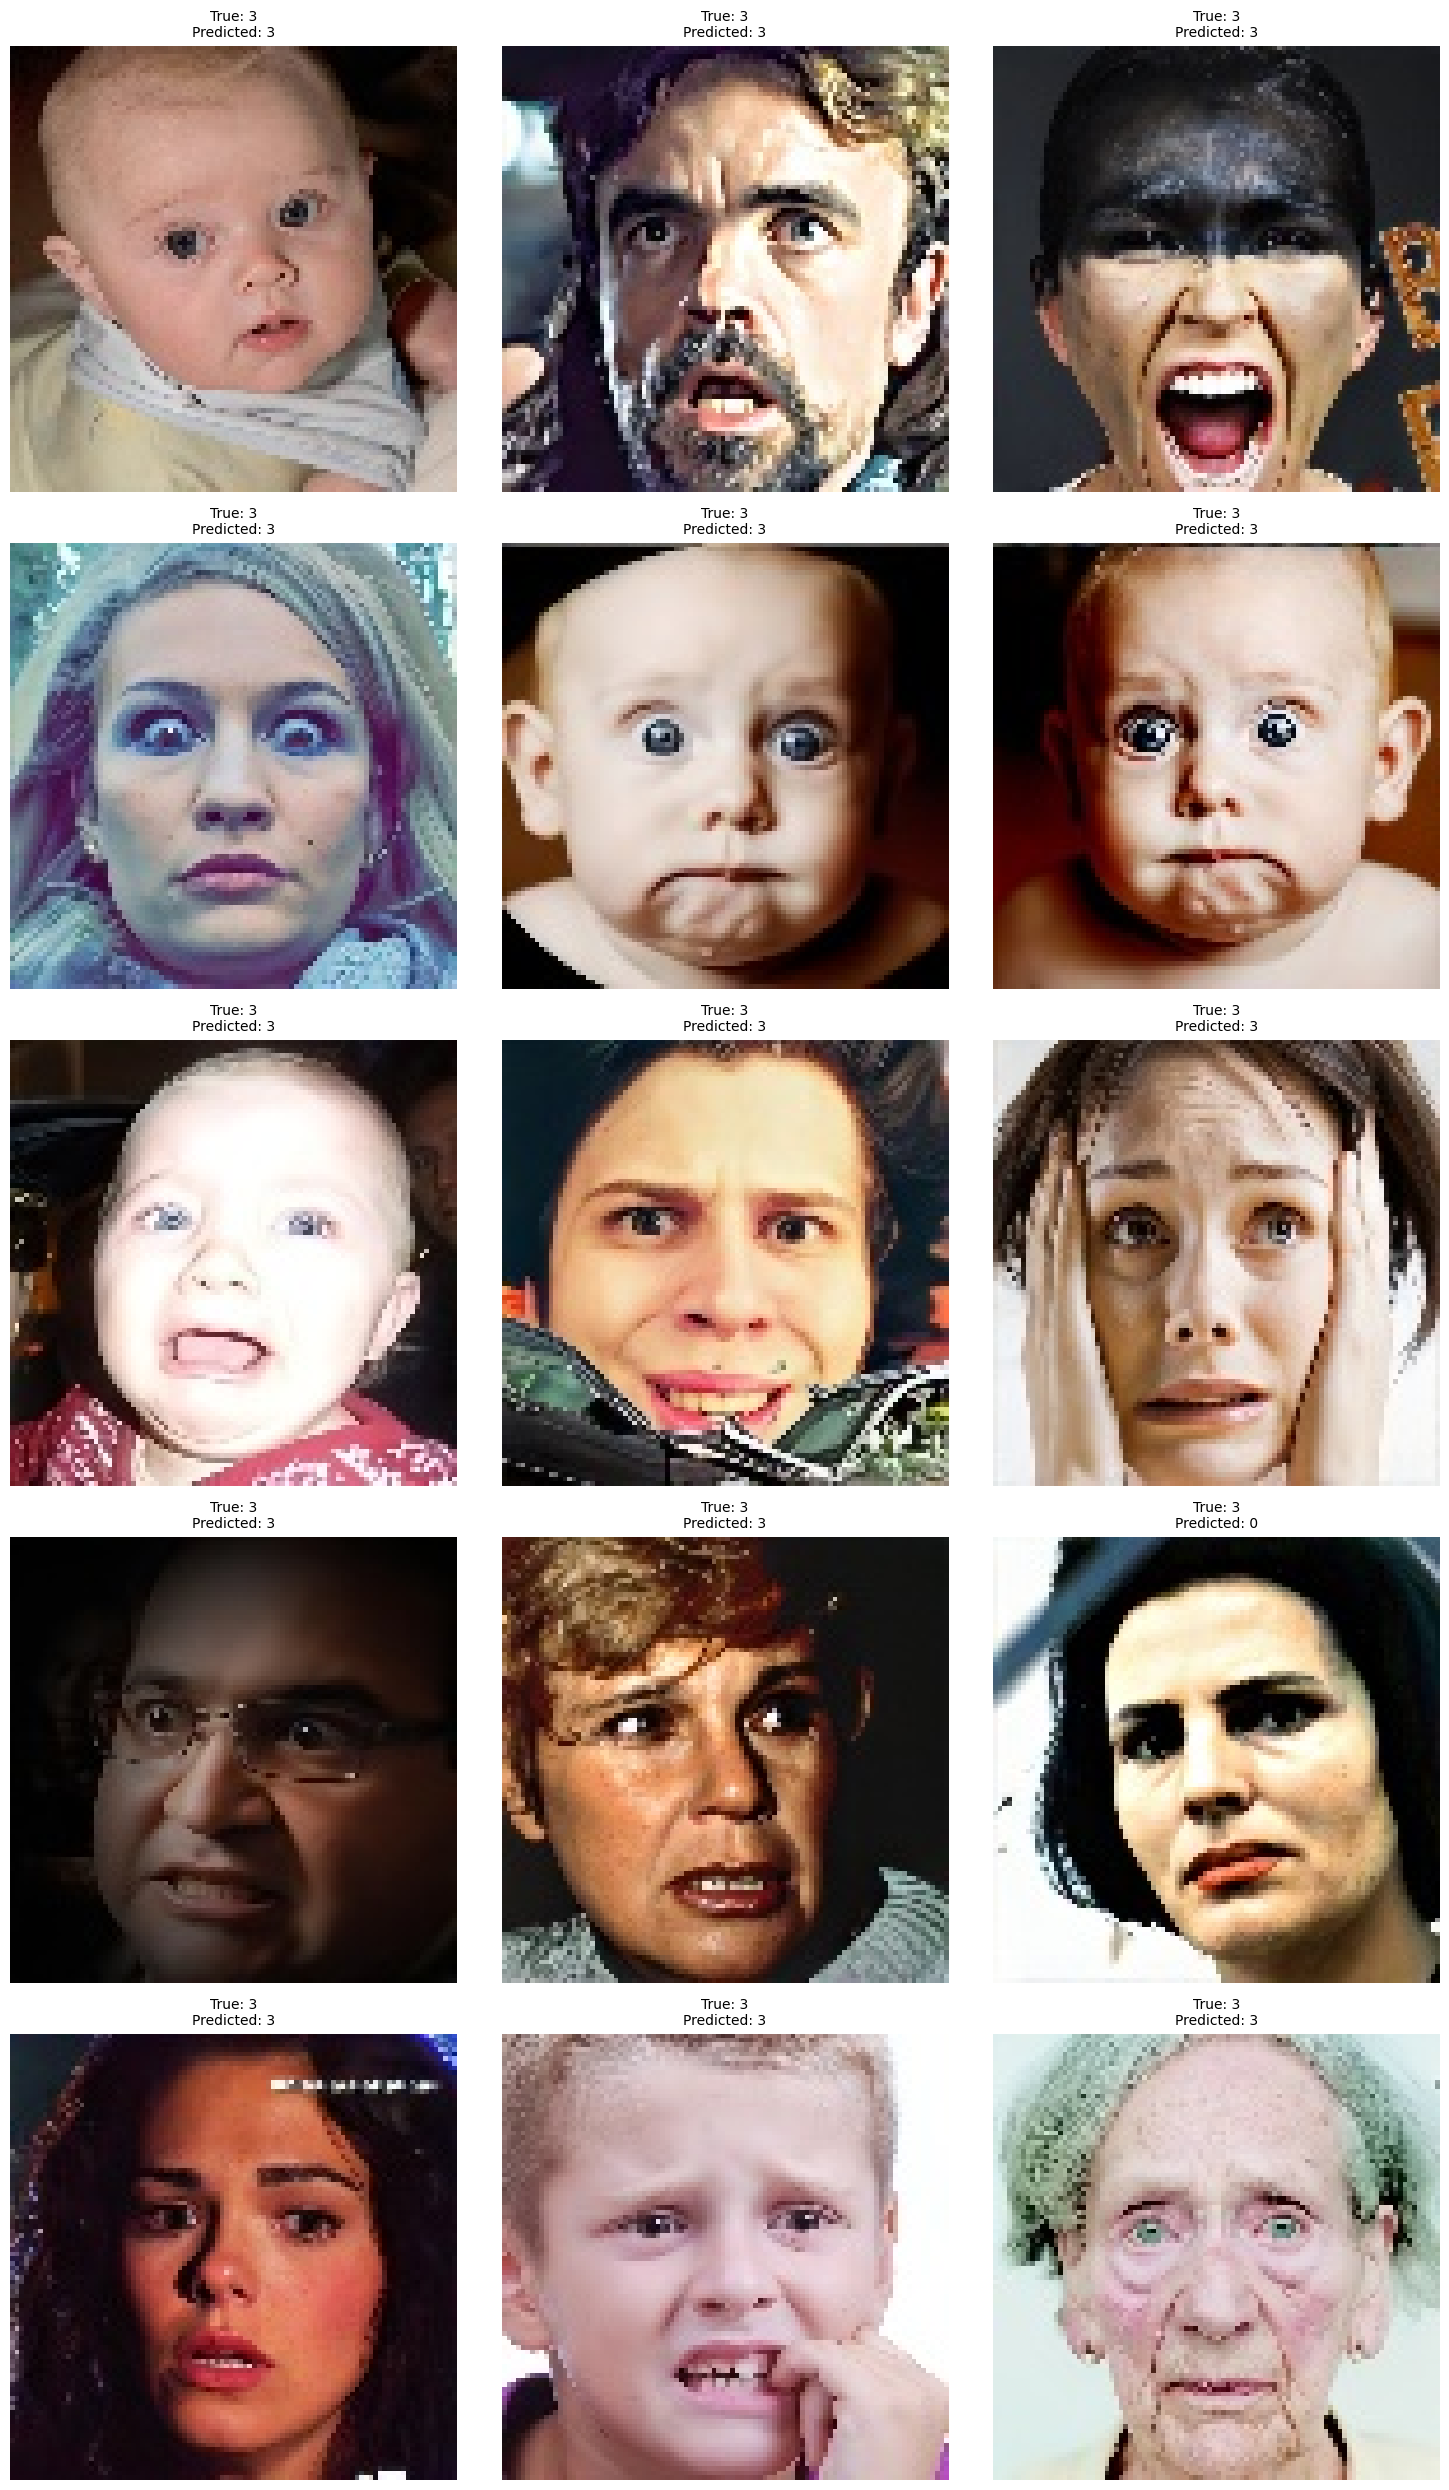

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded test_generator and model

# Get true labels and predictions
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Create a DataFrame for visualization (replace with your actual image paths)
num_images_to_display = 15  # Choose the number of images to display
image_paths = test_generator.filepaths[:num_images_to_display]
meta_data = pd.DataFrame({'Image_path': image_paths})

# Add true and predicted labels to the DataFrame
meta_data['true_label'] = [class_labels[label] for label in true_labels[:num_images_to_display]]
meta_data['predicted_label'] = [class_labels[label] for label in predicted_labels[:num_images_to_display]]

# Display images with labels
plt.figure(figsize=(15, 25))
for i in range(num_images_to_display):
    plt.subplot(5, 3, i + 1)
    img = plt.imread(meta_data['Image_path'].iloc[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {meta_data['true_label'].iloc[i]}\nPredicted: {meta_data['predicted_label'].iloc[i]}", fontsize=10)

plt.tight_layout()
plt.show()

# Saving the model

In [ ]:
model.save('model_DENSENRT201.keras')

# Load the model

In [ ]:
from tensorflow.keras.models import load_model

# Load the model using the correct filename
model = load_model('model_DENSENRT201.keras')

# Testing with external image

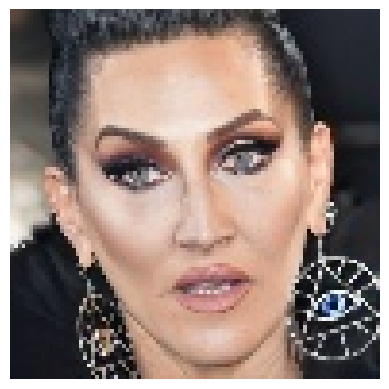

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Melanoma
image_path = '/content/FER_DATA/anger/image0000006.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.applications.densenet import preprocess_input  # Remove or replace with correct preprocessing

def preprocess_image(image_path, target_size=(224, 224)):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    # image_array = preprocess_input(image_array)  # Remove or replace if needed
    # Consider rescaling: image_array = image_array / 255.0
    return image_array

def predict_emotion(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

# Use the correct class labels for facial emotions
class_labels = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

image_path = '/content/FER_DATA/anger/image0000006.jpg'

model = load_model('model_DENSENRT201.keras')

predicted_emotion_label = predict_emotion(model, image_path, class_labels)
print(f"Predicted Emotion: {predicted_emotion_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Predicted Emotion: happy


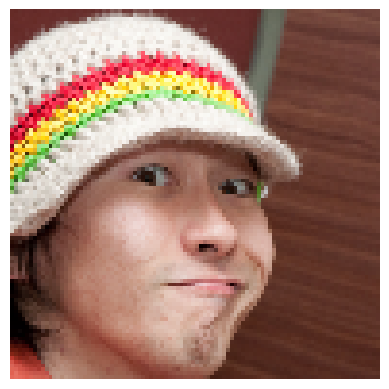

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Actinic Keratoses
image_path1 = '/content/FER_DATA/contempt/ffhq_100.png'
image1 = mpimg.imread(image_path1)

plt.imshow(image1)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.applications.densenet import preprocess_input  # Remove or replace with correct preprocessing

def preprocess_image(image_path, target_size=(224, 224)):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    # image_array = preprocess_input(image_array)  # Remove or replace if needed
    # Consider rescaling: image_array = image_array / 255.0
    return image_array

def predict_emotion(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

# Use the correct class labels for facial emotions
class_labels = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

image_path = '/content/FER_DATA/contempt/ffhq_100.png'

model = load_model('model_DENSENRT201.keras')

predicted_emotion_label = predict_emotion(model, image_path, class_labels)
print(f"Predicted Emotion: {predicted_emotion_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Predicted Emotion: happy


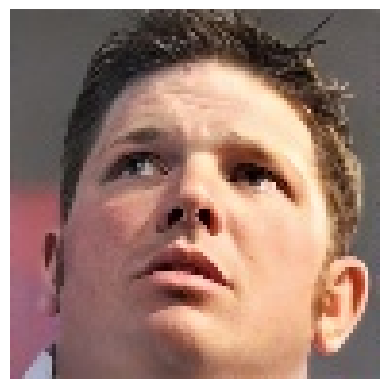

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Basal Cell Carcinoma
image_path3 = '/content/FER_DATA/sad/image0000047.jpg'
image3 = mpimg.imread(image_path3)

plt.imshow(image3)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.applications.densenet import preprocess_input  # Remove or replace with correct preprocessing

def preprocess_image(image_path, target_size=(224, 224)):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    # image_array = preprocess_input(image_array)  # Remove or replace if needed
    # Consider rescaling: image_array = image_array / 255.0
    return image_array

def predict_emotion(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

# Use the correct class labels for facial emotions
class_labels = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

image_path = '/content/FER_DATA/sad/image0000047.jpg'

model = load_model('model_DENSENRT201.keras')

predicted_emotion_label = predict_emotion(model, image_path, class_labels)
print(f"Predicted Emotion: {predicted_emotion_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Predicted Emotion: disgust
